In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
import scipy
from scipy.stats.stats import pearsonr

In [70]:
mydata = pd.read_csv('pima_diabetes.csv')

In [71]:
print (mydata.columns)

Index(['Preg', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class'], dtype='object')


In [72]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
Skin     768 non-null int64
Test     768 non-null int64
Mass     768 non-null float64
Pedi     768 non-null float64
Age      768 non-null int64
Class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
mydata

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [74]:
mydata.head()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
newdata = mydata.replace(0,np.nan)
newdata

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,NaN
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,NaN
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1.0


In [76]:
# Checking out number of Nan values
newdata.isnull().sum()

Preg     111
Plas       5
Pres      35
Skin     227
Test     374
Mass      11
Pedi       0
Age        0
Class    500
dtype: int64

In [89]:
mpreg = np.mean(newdata["Preg"])
mplas = np.mean(newdata["Plas"])
mpres = np.mean(newdata["Pres"])
mskin = np.mean(newdata["Skin"])
mtest = np.mean(newdata["Test"])
mmass = np.mean(newdata["Mass"])
falsevalue = 0
df = newdata.fillna({'Preg':mpreg, 'Plas':mplas, 'Pres':mpres, 'Skin':mskin, 'Test':mtest, 'Mass':mmass, 'Class':falsevalue})
df

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6.000000,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1.0
1,1.000000,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0.0
2,8.000000,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1.0
3,1.000000,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0.0
4,4.494673,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1.0
5,5.000000,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0.0
6,3.000000,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1.0
7,10.000000,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0.0
8,2.000000,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1.0
9,8.000000,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1.0


In [128]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
Skin     0
Test     0
Mass     0
Pedi     0
Age      0
Class    0
dtype: int64

In [90]:
# So, there are no missing values in data 'df'
df[~df.applymap(np.isreal).all(1)]

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class


In [125]:
# An attmpt to normalize data
preprocessing.MinMaxScaler()fit_transform(Preg.values.reshape(-1,1))

SyntaxError: invalid syntax (<ipython-input-125-a1b3b3829223>, line 2)

In [123]:
df.describe()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [94]:
newdata.describe()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,268.0
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,1.0
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.0
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,1.0
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,1.0
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0


In [95]:
# There appears to be a discrepency between the values in 'df' and 'newdata'
# To check whether the data is balanced or not.
df.groupby(["Class"]).count()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age
Class,,,,,,,,
0.0,500,500,500,500,500,500,500,500
1.0,268,268,268,268,268,268,268,268


In [16]:
# This data is unbalanced

In [17]:
# Next, plotting the data by trial and error basis

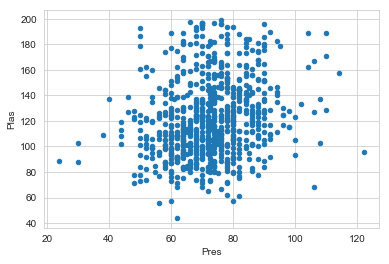

In [96]:
df.plot(kind='scatter', x='Pres', y='Plas') ;
plt.show()

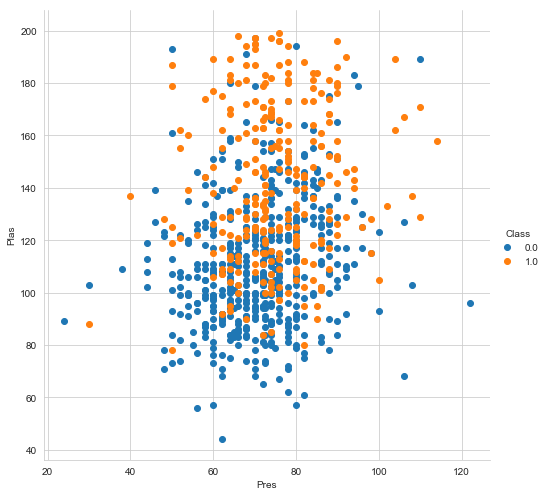

In [97]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Class", height=7) \
   .map(plt.scatter, "Pres", "Plas") \
   .add_legend();
plt.show();

<function matplotlib.pyplot.show(*args, **kw)>

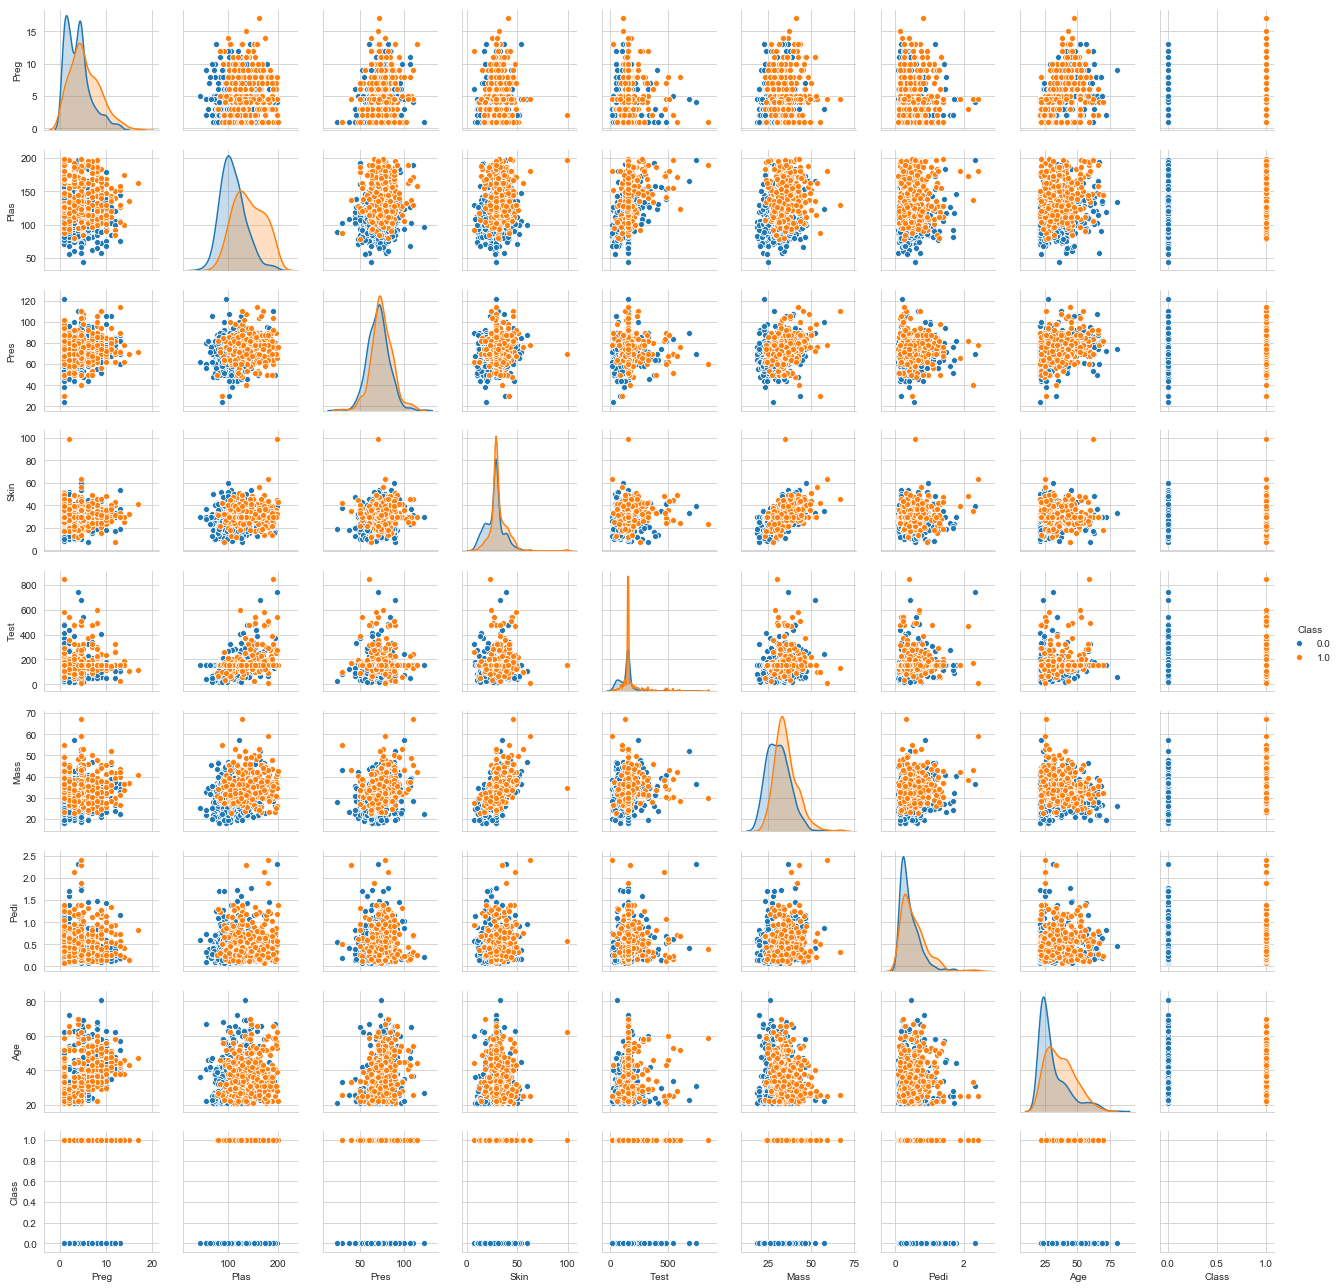

In [98]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df, hue="Class", height=2)
plt.show

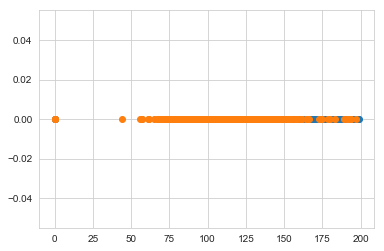

In [38]:
# From the above pair plot we see that glucose is a strong attribute
mydata_Positive = mydata[mydata["Outcome"] == 1]
mydata_Negative = mydata[mydata["Outcome"] == 0]

plt.plot(mydata_Positive["Glucose"], np.zeros_like(mydata_Positive['Glucose']), 'o')
plt.plot(mydata_Negative["Glucose"], np.zeros_like(mydata_Negative['Glucose']), 'o')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


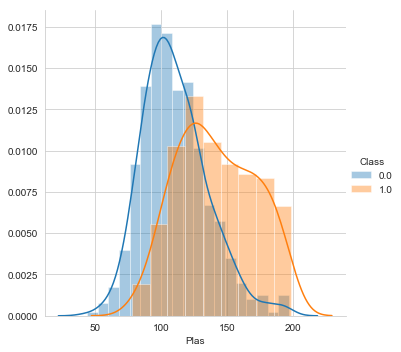

In [129]:
sns.FacetGrid(df, hue="Class", height=5).map(sns.distplot, "Plas").add_legend()
plt.show()

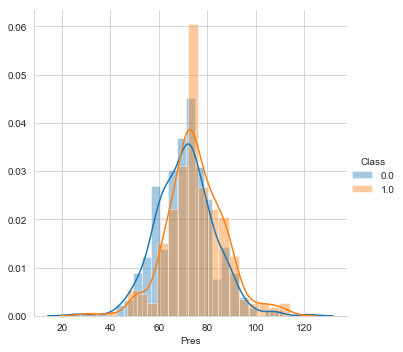

In [130]:
sns.FacetGrid(df, hue="Class", height=5).map(sns.distplot, "Pres").add_legend()
plt.show()

In [41]:
# Glucose is more suitable than Blood Pressure

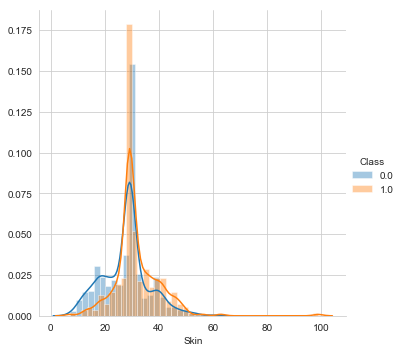

In [131]:
sns.FacetGrid(df, hue="Class", height=5).map(sns.distplot, "Skin").add_legend()
plt.show()

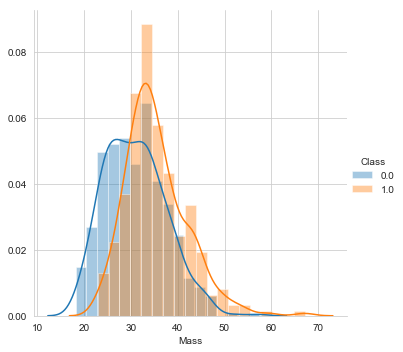

In [132]:
sns.FacetGrid(df, hue="Class", height=5).map(sns.distplot, "Mass").add_legend()
plt.show()

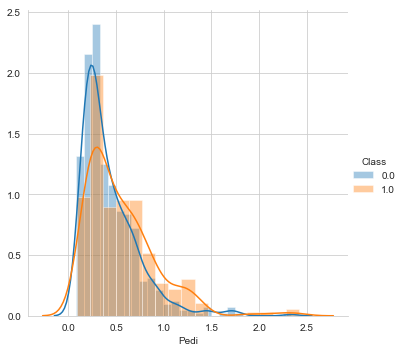

In [133]:
sns.FacetGrid(df, hue="Class", height=5).map(sns.distplot, "Pedi").add_legend()
plt.show()

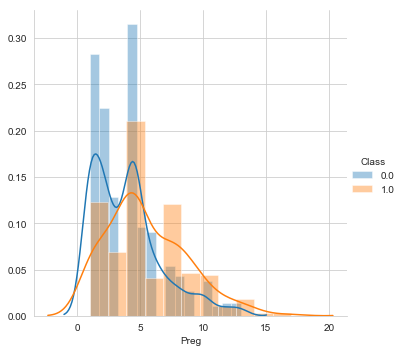

In [135]:
sns.FacetGrid(df, hue="Class", height=5).map(sns.distplot, "Preg").add_legend()
plt.show()

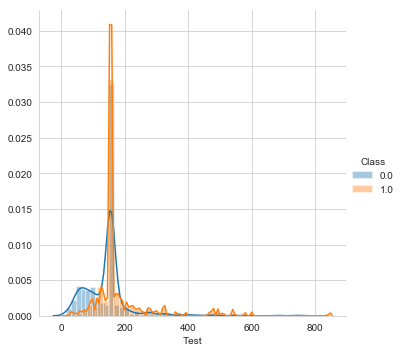

In [136]:
sns.FacetGrid(df, hue="Class", height=5).map(sns.distplot, "Test").add_legend()
plt.show()

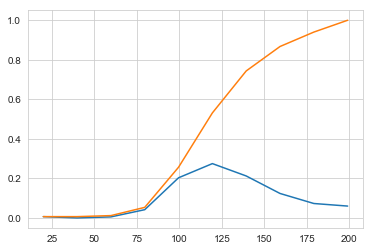

In [52]:
counts, bin_edges = np.histogram(mydata['Glucose'], bins=10, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

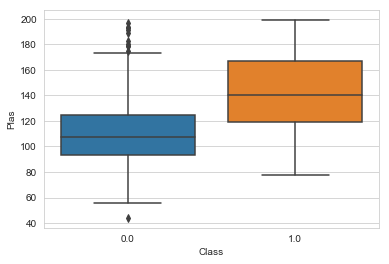

In [138]:
sns.boxplot(x='Class', y='Plas', data=df)
plt.show()

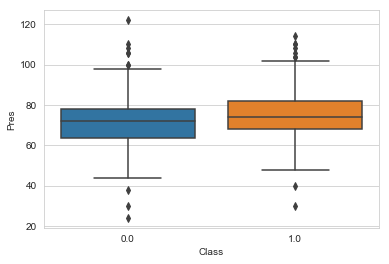

In [140]:
sns.boxplot(x='Class', y='Pres', data=df)
plt.show()

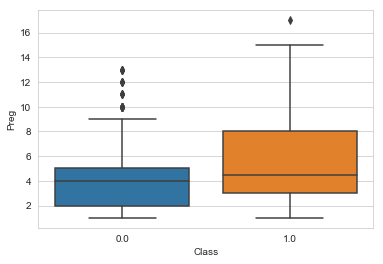

In [141]:
sns.boxplot(x='Class', y='Preg', data=df)
plt.show()

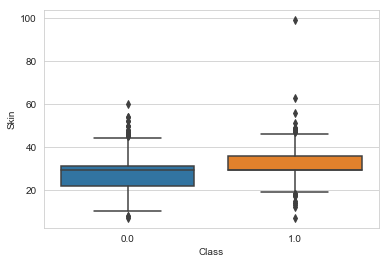

In [142]:
sns.boxplot(x='Class', y='Skin', data=df)
plt.show()

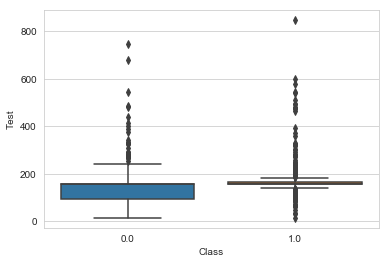

In [143]:
sns.boxplot(x='Class', y='Test', data=df)
plt.show()

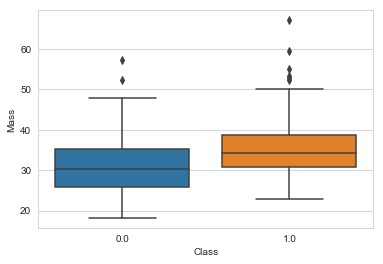

In [144]:
sns.boxplot(x='Class', y='Mass', data=df)
plt.show()

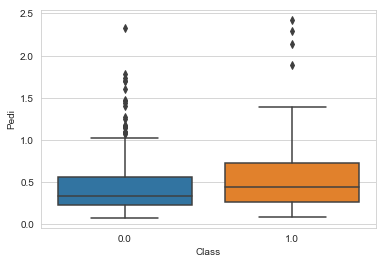

In [145]:
sns.boxplot(x='Class', y='Pedi', data=df)
plt.show()

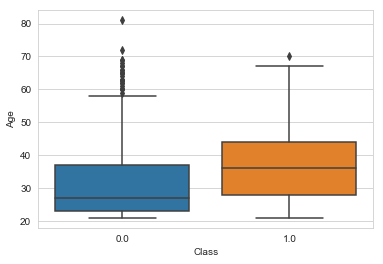

In [146]:
sns.boxplot(x='Class', y='Age', data=df)
plt.show()

In [156]:
# From Box plot we see that 'Glucose' and 'Age' seem to clearly distinguish between the two outcomes positive(1) or negative (0)

In [ ]:
# Ideally to conclude from the data, the following steps need to be taken:
# 1. Data Imputation - Fill missing values with mean, median or mode
# 2. Check whether the the data is balanced or not
# 3. Normalize the data in order to bring them to a common scale
# 4. Check for outliers in data
# 5. Check the correlation between the attributes
# 6. Do data analysis by trial and error methods like scatter plot, pair plot
# 7. Use other methods such as boxplotting or violin plotting  

# From the above plots and data visualization, we see that Glucose is the most prominent attribute.